## ***Problem Statement***

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a
day?

## ***Import Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ***Import Dataset***

In [ ]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## ***check for null values***

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of     Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False>

No null values present

## ***Check for Outliers***

Outliers affects the linear regression problem so its necessary to check if outliers are present in data

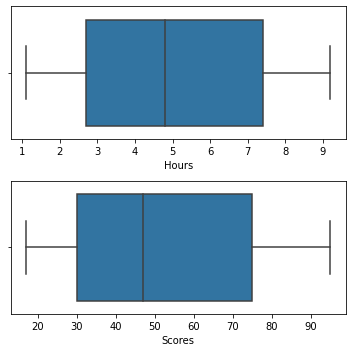

In [ ]:
#checking outliers
fig, axs = plt.subplots(2, figsize=(5,5))
plt1 = sns.boxplot(df['Hours'],ax=axs[0])
plt2 = sns.boxplot(df['Scores'],ax=axs[1])
plt.tight_layout()

No outliers are present in data and the data is uniformly distributed.

## ***Explore relationship between Hours and Scores***

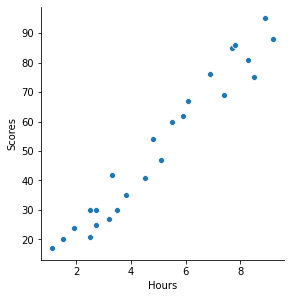

In [ ]:
#Let's see how Scores is related to Hours using scatterplot
sns.pairplot(df, x_vars='Hours', y_vars='Scores', height=4, aspect=1, kind='scatter')
plt.show()

It's very important to see the relationship between two variables, relationship should be linear to use linear regression algorithm

## ***Prepare the data***

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## ***Training the algorithm***

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we have trained our model we will have look at the slope and intercept

In [ ]:
lr.coef_

array([9.78856669])

In [ ]:
lr.intercept_

2.3708153823418883

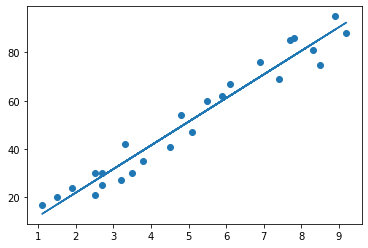

In [ ]:
#Let's plot the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## ***Making Predictions***

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [ ]:
#test with our own data
hours = [[5.25]]
own_pred = lr.predict(hours)
print(f'number of hours :{hours}')
print(f'predicted score : {own_pred[0]}')

number of hours :[[5.25]]
predicted score : 53.76079048777437


## ***Evaluating the model***

In [ ]:
from sklearn import metrics
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.419727808027651
